# Questão 2

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X = np.loadtxt("data_pca_question.csv",
                 delimiter=",")

In [330]:
X

array([[  2.36377864,  -6.42082233,  -0.36402731],
       [  1.97751565,  -2.01800454,   3.97859695],
       [  2.03153387,  -4.97005594,  -2.18583111],
       ...,
       [  2.64450005,  -4.00466208,  -5.14635009],
       [  2.33976935, -10.24804201,  -6.64026619],
       [  3.04055559,  -7.36322362,  -7.39808814]])

## a)

Calculada a média de cada coluna do dataset que tem 3 dimensões

In [331]:
X.mean(axis=0)

array([ 2.52389638, -2.81275819,  0.30387943])

Centralizando os dados em média 0 fazendo a subtração dos valores pela média

In [332]:
X_centered = X - X.mean(axis=0)
X_centered

array([[-0.16011774, -3.60806414, -0.66790673],
       [-0.54638073,  0.79475365,  3.67471752],
       [-0.49236251, -2.15729775, -2.48971054],
       ...,
       [ 0.12060367, -1.19190389, -5.45022952],
       [-0.18412703, -7.43528381, -6.94414562],
       [ 0.51665921, -4.55046542, -7.70196757]])

Por fim, normalizando com variancia em 1 dividindo pelo desvio padrão dos dados

In [333]:
X_normalized = X_centered/X.std(axis=0)
X_normalized

array([[-0.11370511, -0.67076356, -0.07132016],
       [-0.38800373,  0.14775009,  0.39239229],
       [-0.34964354, -0.40105626, -0.26585532],
       ...,
       [ 0.08564481, -0.22158301, -0.58198433],
       [-0.13075493, -1.38226962, -0.74150711],
       [ 0.36689747, -0.84596234, -0.82242857]])

Abaixo é demonstrado que a média está bem próxima de 0 e o desvio padrão igual a 1.

In [334]:
X_normalized.mean(axis=0)

array([-2.13162821e-17,  7.39186490e-16, -4.03010958e-17])

In [335]:
X_normalized.std(axis=0)

array([1., 1., 1.])

## b)

Calculada a variancia da trasnposta da matriz de dados

In [336]:
cov_x = np.cov(X_normalized.transpose())
cov_x

array([[ 1.001001  , -0.53439232, -0.60672834],
       [-0.53439232,  1.001001  ,  0.94108144],
       [-0.60672834,  0.94108144,  1.001001  ]])

Feito o caluclo dos Autovalores e Autovetores utilizando a matriz de covariancia gerada.

In [337]:
eigenvalues, eigenvectors = np.linalg.eig(cov_x)

In [338]:
eigenvalues

array([2.40588855, 0.541553  , 0.05556146])

In [339]:
eigenvectors

array([[ 0.49831409, -0.86283557,  0.08484009],
       [-0.60532847, -0.41630393, -0.6784309 ],
       [-0.62069357, -0.28671556,  0.72974905]])

Quanto maior o Autovalor (```eigenvalues```), maior está preservada a variância, sendo assim as componentes principais. Em que os Autovetores (```eigenvectors```) são representados por cada coluna da variável, estando na ordem das Componentes principais, primária, secundária e terciária.

## c)

Analisando a razão da soma dos Autovalores, é possível identificar se a proporção de variância se mantém acima de 90% em determinada dimensão ```k``` que é um nível de variância preservado considerado ok.

In [340]:
eigenvalues[0]/eigenvalues.sum()

0.801160886303813

In [341]:
(eigenvalues[0]+eigenvalues[1])/eigenvalues.sum()


0.9814980354787338

In [342]:
(eigenvalues[0]+eigenvalues[1]+eigenvalues[2])/eigenvalues.sum()

1.0

Considerando um threshold de 90%, é possível reduzir a dimensionalidade para 2 sem perder uma quantidade significativa de variância na informação.

## d)

Primeiramente os dados originais plotados para ter uma noção dos dados apresentados

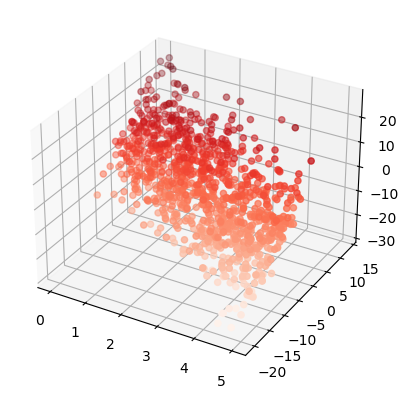

In [343]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = X[:, 0]
ydata = X[:, 1]
zdata = X[:, 2]

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds')

Feita a redução de dimensionalidade PCA para uma e duas dimensões fazendo o produto das matrizes dos dados originais normalizados com os autovetores.

In [344]:
pca_data_1d = X_normalized.dot(eigenvectors[:,0:1])
pca_data_2d = X_normalized.dot(eigenvectors[:,0:2])

Abaixo, o plot dos dados originais normalizados com os dados reduzidos pelo PCA, mostrando o 2D atuando em duas dimensões sendo um plano, e o de 1 dimensão sendo uma reta.

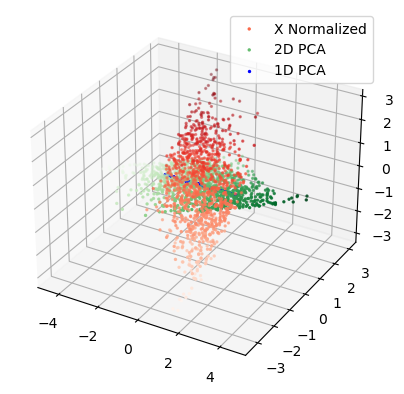

In [350]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = X_normalized[:, 0]
ydata = X_normalized[:, 1]
zdata = X_normalized[:, 2]

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds', s=2, label='X Normalized')

xdata = pca_data_2d[:, 0]
ydata = pca_data_2d[:, 1]
zdata = 0

ax.scatter3D(xdata, ydata, zdata, c=xdata, cmap='Greens', s=2, label='2D PCA')

xdata = X_normalized[:, 0]
ydata = 0
zdata = 0

ax.scatter3D(xdata, ydata, zdata, color='blue', s=2, label='1D PCA')

ax.legend(loc='upper right')

Aqui foi feita a reconstrução dos dados, pegando os dados reduzidos por PCA multiplicando pelos Autovetores com o número de componentes principais de acordo com a dimensionalidade dos dados, foi adiconado a média que foi retirada no inicio para a normalização, assim como a multiplicação pelo desvio padrão.

In [351]:
reconstructed_2d = (pca_data_2d.dot(eigenvectors[0:2]) + X.mean(axis=0))*X.std(axis=0)
reconstructed_1d = (pca_data_1d.dot(eigenvectors[0:1]) + X.mean(axis=0))*X.std(axis=0)

# reconstructed_2d = (pca_data_2d.dot(eigenvectors[0:2]))
# reconstructed_1d = (pca_data_1d.dot(eigenvectors[0:1]))

Em seguida, foi realizado o plot dos dados originais e as reconstruções em 2D e 1D do PCA.

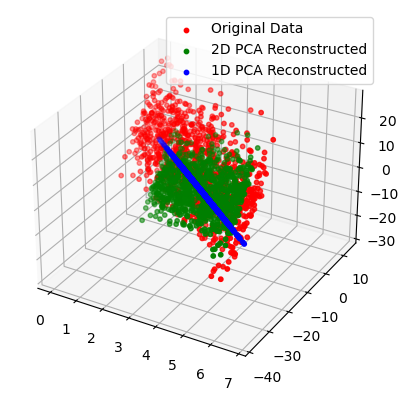

In [353]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = X[:, 0]
ydata = X[:, 1]
zdata = X[:, 2]

ax.scatter3D(xdata, ydata, zdata, color='red', s=10, label='Original Data')

xdata = reconstructed_2d[:, 0]
ydata = reconstructed_2d[:, 1]
zdata = reconstructed_2d[:, 2]

ax.scatter3D(xdata, ydata, zdata, color='green', s=10, label='2D PCA Reconstructed')

xdata = reconstructed_1d[:, 0]
ydata = reconstructed_1d[:, 1]
zdata = reconstructed_1d[:, 2]

ax.scatter3D(xdata, ydata, zdata, color='blue', s=10, label='1D PCA Reconstructed')
ax.legend(loc='upper right')

## e)

Com o PCA é possível fazer a redução da dimensionalidade, sendo útil em diversas análises, como casos de simplicar os dados sem perder muita informação. Nesse caso reduzir para 2 dimensões manteve um bom nível de informação, enquanto que 1 dimensão houve grande perda, como pode ser visto na reconstrução.

Há casos em que a redução é feita para 2 ou 3 dimensões para fazer uma análise visual dos dados, conseguindo retirar insights. 

Para esse dataset, a redução para 2 dimensões é possível, mantendo cerca de 98% da variância. Podendo ser útil para insights ou utilizar em duas dimensões para outros algortimos de classificação ou clusterização como exemplo.
